In [ ]:
from evolvium import genetic_algorithm as ga
import numpy as np
import string
from copy import copy

## Exemplo combinacional com gene Inteiro 

Loading Initial Population | Current Fitness = 2.22e+03:   0%|          | 0/1000 [00:00<?, ?it/s]

Loading Initial Population | Current Fitness = 1.48e+03: 100%|██████████| 1000/1000 [00:00<00:00, 1018.58it/s]
AVG = 1.86e+03 | BEST = 1.20e+03 | blC%N6SÂWEâ5k¹"PSr]-fJX/ |Total Calls  4125 |    67 | Mutation Rate = 3.00%:   1%|          | 11/1000 [00:04<07:09,  2.30it/s]
AVG = 1.86e+03 | BEST = 1.20e+03 | Calls  4432 |    78 | Mutation Rate = 3.00%:   1%|          | 11/1000 [00:04<07:09,  2.30it/s]
AVG = 1.10e+03 | BEST = 6.35e+02 | ?{74 |   407 | Mutation Rate = 3.00%:   5%|▍         | 49/1000 [00:21<06:56,  2.28it/s]       | 38/1000 [00:16<06:57,  2.31it/s]s]
AVG = 1.10e+03 | BEST = 6.35e+02 | ?{s 16289 |   420 | Mutation Rate = 3.00%:   5%|▍         | 49/1000 [00:21<06:56,  2.28it/s]
AVG = 1.08e+03 | BEST = 6.35e+02 | ?{s 16289 |   420 | Mutation Rate = 3.00%:   5%|▌         | 50/1000 [00:21<06:54,  2.29it/s]
AVG = 1.08e+03 | BEST = 6.35e+02 | ?{s 16598 |   426 | Mutation Rate = 3.00%:   5%|▌         | 50/1000 [00:21<06:54,  2.29it/s]
AVG = 5.40e+02 | BEST = 3.48e+02 | ?n4;ec

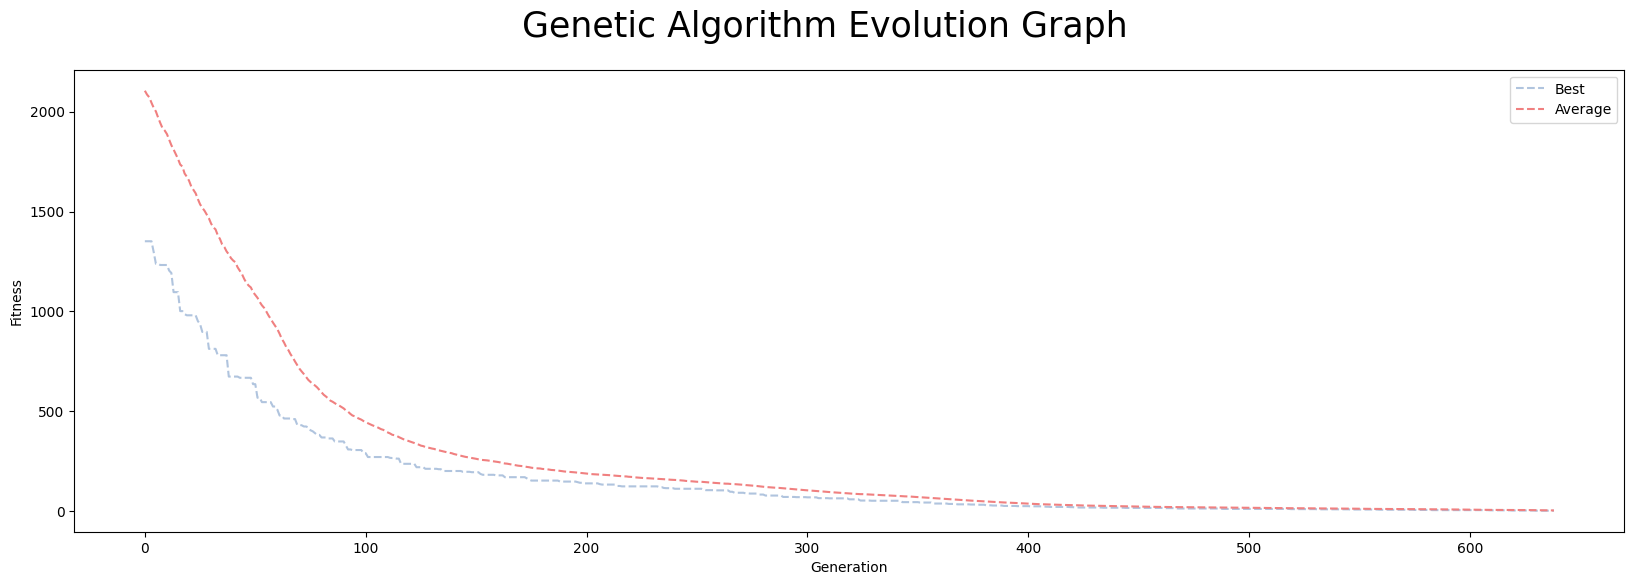

Hey, Jude, don't make it bad

In [ ]:
'''
Definição do problema

O problema consiste em encontrar uma sequência de caracteres que seja idêntica à string alvo "Hey, Jude, don't make it bad" utilizando um algoritmo genético.
Para isso, cada indivíduo da população representa uma sequência de códigos ASCII que, quando convertidos de volta para caracteres, formam uma string.
O objetivo do algoritmo é minimizar a diferença entre a string gerada e a string alvo, ou seja, aproximar o mais possível os valores dos códigos ASCII dos 
caracteres da solução ideal.

A função de aptidão (dist) calcula a diferença entre a string gerada e a string alvo, somando as diferenças absolutas entre os códigos ASCII dos caracteres 
correspondentes. O algoritmo genético seleciona, cruza e mutaciona indivíduos da população, favorecendo aqueles cuja sequência de caracteres esteja mais 
próxima da string alvo.

'''

goal = """Hey, Jude, don't make it bad"""

def dist(candidate):
    d = 0
    for i,c in enumerate(candidate):
        d += abs(c - ord(goal[i]))  # Calcula a diferença entre o candidato e a string alvo
    
    return d  # Retorna o valor total da diferença

def repr(candidate):
    return ''.join(map(lambda c: chr(c), candidate))  # Converte a sequência de códigos ASCII de volta para uma string

# Parâmetros do algoritmo genético
kwargs = {
    'metric': dist,  # Função de aptidão
    'repr': repr,  # Função de representação
    'gene_type': 'integer',  # Tipo de gene (inteiro)
    'gene_size': len(goal),  # Tamanho do gene igual ao tamanho da string alvo
    'gene_upper_limit': 255,  # Limite superior dos genes, correspondente ao valor máximo de um código ASCII
    'mutation_range': (-10, 10),  # Faixa de alteração para a mutação
    'mutation_type': 'random range',  # Tipo de mutação (aleatória no intervalo)
    'crossover_type': "split",  # Tipo de cruzamento (divisão)
    'cache_size': 1000,  # Tamanho do cache
    'chromossome_size': 1  # Tamanho do cromossomo
}

# Execução do algoritmo genético
result = ga.run(max_gen=1000, pop_size=1000, prole_size=300, mutation_rate=(3/100, 10/100), verbose=True, **kwargs)
print(result)


## Exemplo combinacional com gene Binario

Loading Initial Population | Current Fitness = 2.00e+03:   0%|          | 0/1000 [00:00<?, ?it/s]

Loading Initial Population | Current Fitness = 8.80e+19: 100%|██████████| 1000/1000 [00:01<00:00, 827.14it/s]
AVG = 4.20e+03 | BEST = 5.90e+01 | 1*2*3*7*7*7=2058 |Total Calls  3054 |  4868 | Mutation Rate = 5.04%:  16%|█▋        | 49/300 [00:07<00:38,  6.46it/s]


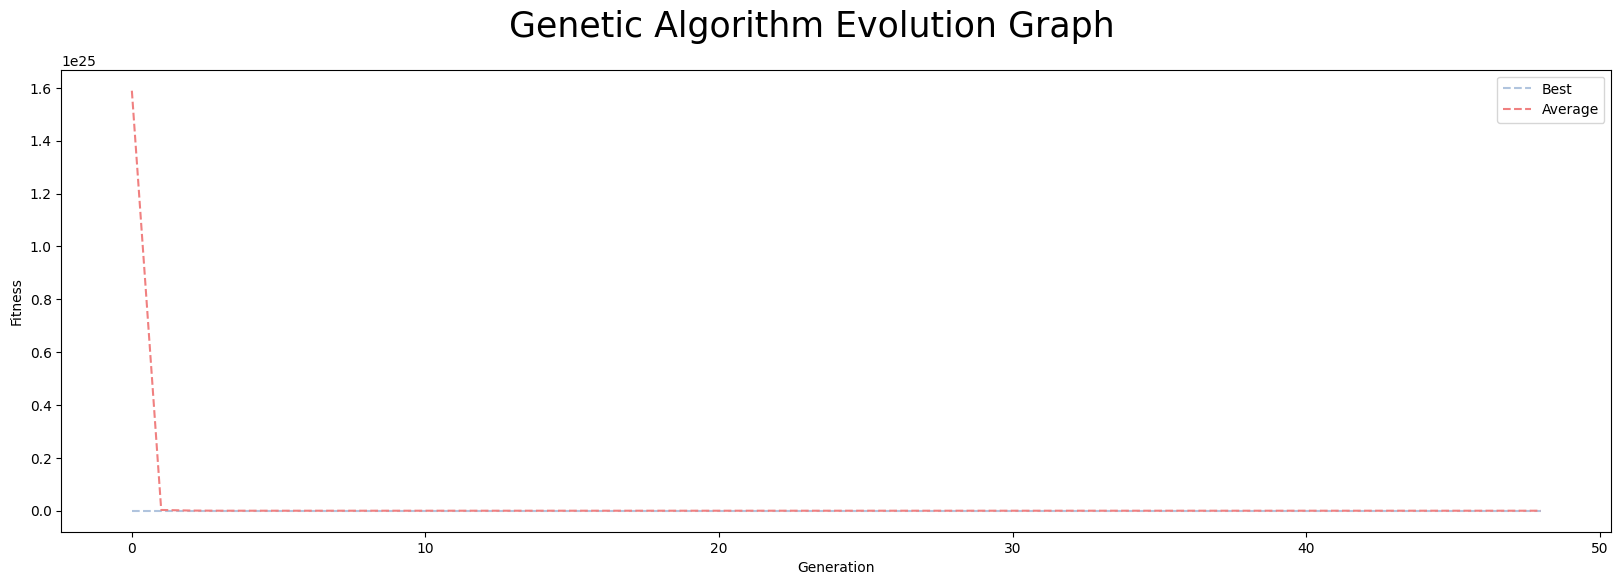

1*3*5*7*19=1995


In [2]:
'''
Definição do problema

O problema consiste em encontrar uma decomposição do número 1999 como o produto de números primos da lista fornecida,
com a condição de que cada número da decomposição seja representado por um cromossomo binário de tamanho 4. O objetivo
é usar um algoritmo genético para encontrar uma solução em que o produto dos números primos seja o mais próximo 
possível de N.

A representação do problema envolve a utilização de uma lista de números primos e a conversão de sequências binárias 
ara índices desses primos. O gene é formado por 4 bits, com cada grupo de 4 bits representando a escolha de um número
 primo. A decomposição aceita no máximo 20 números primos, e o gene total terá 80 bits.

A função de aptidão (dist) calcula a diferença entre o produto dos números primos gerados a partir do cromossomo e o 
número alvo N, retornando a distância absoluta entre o produto e o valor alvo.

'''

prime_numbers = [1,2,3,5,7,11,13,17,19,23,27,29,31,41,43,47]
target = 1999

'''
gene será uma lista binária com cada cromossomo representando uma posição na lista.
O cromossomo tem tamanho 4.
Aceitaremos respostas com até 20 números na decomposição.
Tamanho do gene = 4*20 = 80.
'''

def bin2int(candidate):
    r = 0
    for i, c in enumerate(candidate):
        r += (2**i) if c else 0  # Converte a sequência binária para um índice de número primo
    return r

def decode(candidate):
    l_primes = []
    for i in range(20):  # Decomposição em até 20 primos
        l_primes.append(prime_numbers[bin2int(candidate[i*4:(i+1)*4])])
    
    l_primes = list(filter(lambda x: x != 1, l_primes))  # Remove o número 1, que não é primo
    return l_primes

def dist(candidate):
    values = decode(candidate)
    r = 1
    for v in values:
        r *= v  # Calcula o produto dos números primos
    return abs(r - target)  # Retorna a distância entre o produto e o alvo

def repr(candidate):
    l_primes = decode(candidate)
    l_primes.sort()
    r = 1
    str_r = '1'
    for v in l_primes:
        r *= v  # Calcula novamente o produto
        str_r += f'*{v}'  # Concatena a representação dos primos
    return str_r + f'={r}'  # Retorna a representação do produto final

# Parâmetros do algoritmo genético
kwargs = {
    'metric': dist,  # Função de aptidão
    'repr': repr,  # Função de representação
    'gene_type': 'binary',  # Tipo de gene (binário)
    'gene_size': 80,  # Tamanho do gene (80 bits)
    'mutation_type': 'random range',  # Tipo de mutação (aleatória no intervalo)
    'crossover_type': "random mix",  # Tipo de cruzamento (mistura aleatória)
    'cache_size': 1000,  # Tamanho do cache
    'chromossome_size': 4,  # Tamanho de cada cromossomo (4 bits)
    'init_method': 'mix'  # Método de inicialização (misto)
}

# Execução do algoritmo genético
result = ga.run(max_gen=300, pop_size=1000, prole_size=100, mutation_rate=(5/100, 15/100), stop=10, verbose=True, **kwargs)
print(result)


## Exemplo para gene Real

Loading Initial Population | Current Fitness = 2.23e+06: 100%|██████████| 100/100 [00:00<00:00, 1129.74it/s]
AVG = 3.95e-04 | BEST = 3.95e-04 | [-0.52 3.25 7.72 2.86 ] = 3.95e-04 |Total Calls  1563 |  9096 | Mutation Rate = 1.00%:   2%|▏         | 972/50000 [00:04<03:39, 222.89it/s]


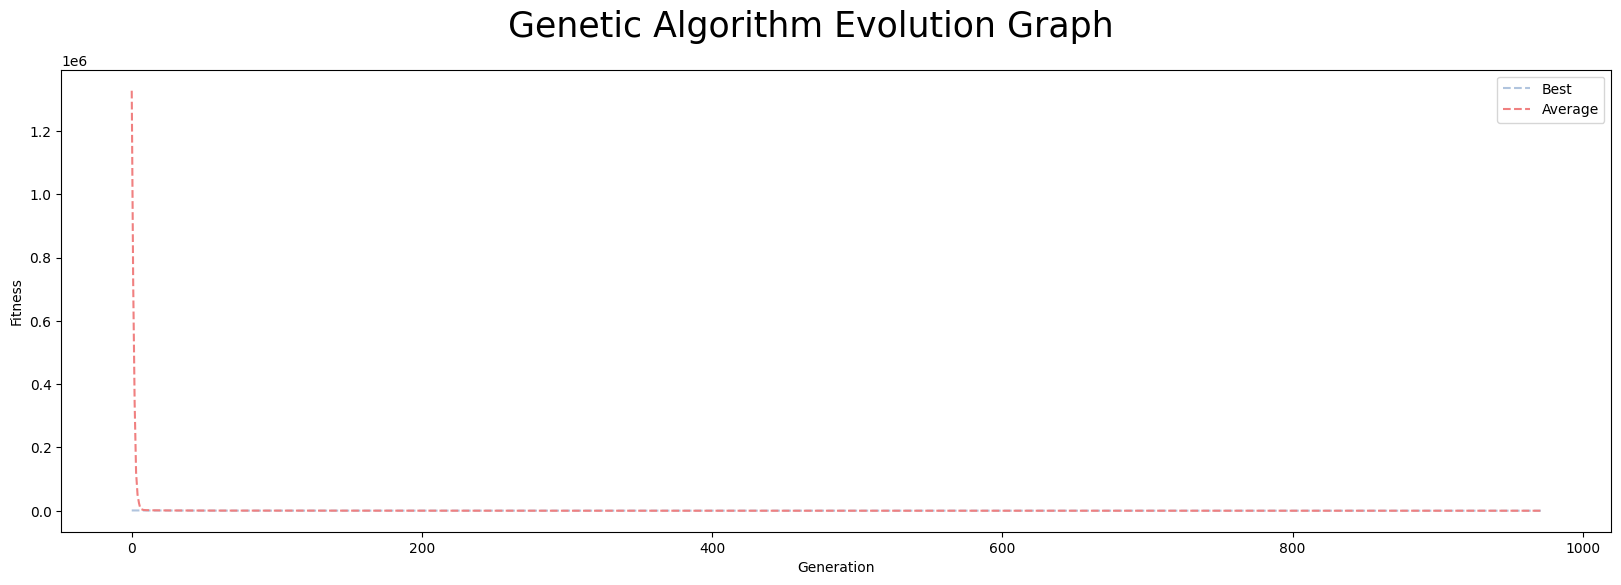

[-0.52 3.25 7.72 2.86 ] = 3.24e-05


In [3]:
'''
Definição do problema

O problema consiste em minimizar a função:

f(a, b, c, d) = |a^5 + b^2 - c^3 - d^7 + 1999|

Onde a, b, c e d são valores reais representados como cromossomos. A função de aptidão 
retorna um valor de penalização de 100 se algum valor do candidato for zero, e retorna 
o valor absoluto da expressão mencionada acima caso contrário. O objetivo é encontrar 
os valores de a, b, c e d que minimizam essa função, ou seja, os valores que aproximam 
o resultado da função o mais próximo possível de zero.

A representação do candidato (cromossomo) é feita por uma lista de 4 números reais, 
sendo um para cada variável da função (a, b, c e d).

A função `repr` cria uma string com a representação do candidato e o valor da 
função de aptidão para esse candidato.

O algoritmo genético busca otimizar esses valores através de mutação e cruzamento 
de cromossomos para evoluir soluções melhores a cada geração.

'''

def func(candidate):
    a, b, c, d = candidate
    for v in candidate:
        if v == 0:
            return 100  # Penalização se algum valor do candidato for 0

    return abs(a**5 + b**2 - c**3 - d**7 + 1999)  # Função de aptidão

def repr(candidate):
    str_r = ''
    for c in candidate:
        str_r += f'{round(c, 2)} '  # Representação do candidato com 2 casas decimais
    return f'[{str_r}] = {func(candidate):.2e}'  # Retorna a representação do candidato e o valor da função de aptidão

kwargs = {
    'metric': func,  # Função de aptidão
    'repr': repr,  # Função de representação
    'gene_type': 'real',  # Tipo de gene (real)
    'gene_size': 4,  # Número de genes (variáveis)
    'mutation_type': 'random range',  # Tipo de mutação (aleatória no intervalo)
    'crossover_type': "random mix",  # Tipo de cruzamento (mistura aleatória)
    'cache_size': 1000,  # Tamanho do cache
    'init_method': 'random'  # Método de inicialização (aleatória)
}

# Execução do algoritmo genético
result = ga.run(max_gen=50000, pop_size=100, prole_size=10, mutation_rate=(1/100, 15/100), stop=0.0001, verbose=True, **kwargs)
print(result)  # Exibe o resultado
